In [1]:
import os
import glob
import json
import tqdm

import numpy as np
import pandas as pd
import nibabel as nib

# 01 - General Description and some statistics of the Dataset

## 1.0 Generate csv file with basic information per image
 - voxel size
 - field of view
 - volume of aneurysm class

In [45]:
tof_data_dir = '../../../../data/raw/Lausanne/original_images'
label_data_dir = '../../../../data/raw/Lausanne/skull_stripped_and_aneurysm_mask'
image_tof_fps = glob.glob(os.path.join(tof_data_dir, '*', '*', '*', '*_angio.nii.gz'))
image_tof_fps_df = pd.DataFrame([{'image_name': image_tof_fp.split('/')[-4],
                                  'image_tof_fp': image_tof_fp} 
                                 for image_tof_fp in image_tof_fps])
image_label_fps = glob.glob(os.path.join(label_data_dir, '*', '*', '*', '*Lesion_1_mask.nii.gz'))
image_label_fps_df = pd.DataFrame([{'image_name': image_label_fp.split('/')[-4],
                                    'image_label_fp': image_label_fp} 
                                   for image_label_fp in image_label_fps])


In [50]:
image_paths_df = pd.merge(image_tof_fps_df, image_label_fps_df, on='image_name')
image_paths_df.set_index('image_name', inplace=True)
image_paths_df.head()

,image_tof_fp,image_label_fp
image_name,,
sub-471,../../../../data/raw/Lausanne/original_images/...,../../../../data/raw/Lausanne/skull_stripped_a...
sub-458,../../../../data/raw/Lausanne/original_images/...,../../../../data/raw/Lausanne/skull_stripped_a...
sub-451,../../../../data/raw/Lausanne/original_images/...,../../../../data/raw/Lausanne/skull_stripped_a...
sub-474,../../../../data/raw/Lausanne/original_images/...,../../../../data/raw/Lausanne/skull_stripped_a...
sub-450,../../../../data/raw/Lausanne/original_images/...,../../../../data/raw/Lausanne/skull_stripped_a...


In [56]:
aneurysm_label = 1
basic_desc = []
for image_name, row in tqdm.tqdm(image_paths_df.iterrows()):
    
    img_fp = row['image_tof_fp']
    label_fp = row['image_label_fp']
    
    print('processing image: ', image_name,  end='\r')
    
    # load nift image
    img = nib.load(img_fp)
    aneurysm_mask = nib.load(label_fp)
    
    # Get voxel_size_in each dimension
    y_size, x_size, z_size = img.header.get_zooms()
    
    # Get field of view in each dimension
    y_fov = y_size * img.shape[0]
    x_fov = x_size * img.shape[1]
    z_fov = z_size * img.shape[2]
    
    # Volume of the aneurysm
    aneurysm_volume = np.sum(aneurysm_mask.get_fdata() == aneurysm_label) * y_size * x_size * z_size
    
    basic_desc.append(
        {
            'img_name': image_name,
            'y_size': y_size,
            'x_size': x_size,
            'z_size': z_size,
            'y_fov': y_fov,
            'x_fov': x_fov,
            'z_fov': z_fov,
            'aneurysm_volume': aneurysm_volume
        }
    )

0it [00:00, ?it/s]

1it [00:00,  4.77it/s]

3it [00:00,  6.82it/s]

5it [00:00,  5.66it/s]

7it [00:01,  6.76it/s]

9it [00:01,  7.11it/s]

10it [00:01,  6.34it/s]

12it [00:01,  6.81it/s]

13it [00:02,  5.92it/s]

14it [00:02,  5.55it/s]

17it [00:02,  7.14it/s]

20it [00:02,  8.29it/s]

23it [00:03,  9.25it/s]

24it [00:03,  8.04it/s]

26it [00:03,  6.60it/s]

28it [00:03,  7.65it/s]

30it [00:04,  6.60it/s]

32it [00:04,  6.05it/s]

33it [00:04,  5.58it/s]

34it [00:05,  5.34it/s]

37it [00:05,  6.89it/s]


In [57]:
basic_desc_df = pd.DataFrame(basic_desc).set_index('img_name')

basic_desc_df

,y_size,x_size,z_size,y_fov,x_fov,z_fov,aneurysm_volume
img_name,,,,,,,
sub-471,0.245536,0.245536,0.700001,176.785716,220.000002,112.000151,123.312808
sub-458,0.546875,0.546875,0.699997,167.343750,210.000000,90.999565,44.800811
sub-451,0.286458,0.286458,0.500002,199.375007,220.000008,100.000441,26.340857
sub-474,0.286458,0.286458,0.499999,199.375007,220.000008,99.999803,29.869192
sub-450,0.286458,0.286458,0.650003,174.166673,220.000008,130.000520,45.070747
sub-472,0.546875,0.546875,0.700003,167.343750,210.000000,112.000408,7562.608127
sub-459,0.286458,0.286458,0.600003,179.895821,219.999985,120.000565,93.940859
sub-488,0.468750,0.468750,0.699999,165.000000,210.000000,111.999798,9.536116
sub-481,0.234375,0.234375,0.700005,168.750000,210.000000,112.000732,21.840963


In [58]:
basic_desc_df = pd.DataFrame(basic_desc).set_index('img_name')
basic_desc_df['total_fov'] = basic_desc_df[['y_fov', 'x_fov', 'z_fov']].agg(np.multiply.reduce, axis=1)
basic_desc_df.to_csv('basic_info_Laussane_dataset.csv')

### What is the distribution of resolutions of the scans


In [63]:
basic_desc_df[['y_size', 'x_size', 'z_size']].describe()

,y_size,x_size,z_size
count,37.000000,37.000000,37.000000
mean,0.359254,0.359254,0.621081
std,0.129436,0.129436,0.095882
min,0.234375,0.234375,0.499998
25%,0.273438,0.273438,0.500001
50%,0.286458,0.286458,0.699997
75%,0.546875,0.546875,0.700001
max,0.546875,0.546875,0.700007


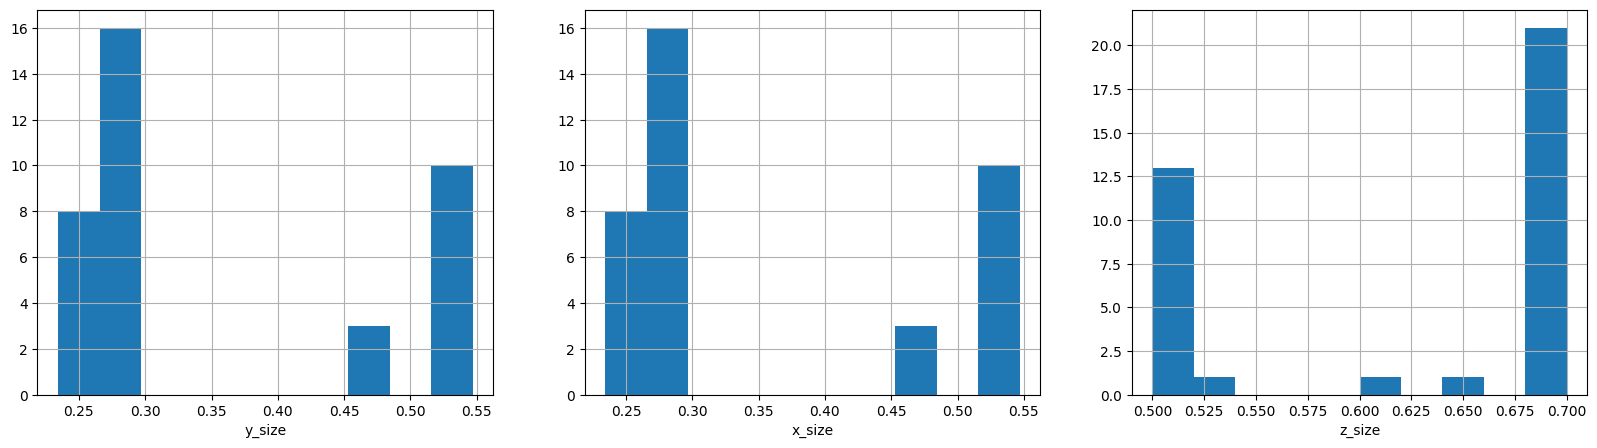

In [62]:
# Plot the histogram of y_size, x_size, z_size in 3 subfigures
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
basic_desc_df['y_size'].hist(ax=axes[0])
basic_desc_df['x_size'].hist(ax=axes[1])
basic_desc_df['z_size'].hist(ax=axes[2])
axes[0].set_xlabel('y_size')
axes[1].set_xlabel('x_size')
axes[2].set_xlabel('z_size')
plt.savefig('Laussane_dataset_size_histogram.png')

We can pick either "10745241-MCA-new" (decent FoV and very small aneurysm) and "10600633-AComm-new-Colors" (overlaps in top 15 largest field of views in total and in the z axis, while being in top 15 smallest aneurysms)

## 1.1 Distribution of UIAs location (per Vessel Type)

In [73]:
img.header.get_data_shape()

(652, 768, 168)

In [75]:
img.header["dim"][1:4]

array([652, 768, 168], dtype=int16)

## 1.2 Distribution of UIAs location (per Vessel Type and territory)

## 1.3 Distribution of UIAs per size

### Per maximum diameter 

For example in ranges [0, 5mm), [5mm, 10mm), [10mm, inf)

### Per volume

### Per maximum median radius

## 1.4 Distribution of UIAs type (saccular or fusiform)